In [1]:
# -*- coding: utf-8 -*-
"""
@author: Ketki

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
dataset = pd.read_csv('iris.csv')
dataset.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

print(x.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 0)


C:\Users\Ketki\Anaconda_new\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class = "multinomial",solver="lbfgs", C=10)
#lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred

C:\Users\Ketki\Anaconda_new\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

In [7]:
y_pred_train = lr.predict(X_train)


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[34,  0,  0],
       [ 0, 31,  1],
       [ 0,  0, 39]], dtype=int64)

In [9]:
cm_test = confusion_matrix(y_test, y_pred)
cm_test

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [10]:
softmax_pred1 = lr.predict([[1,1,1,1]])
softmax_pred1


array(['setosa'], dtype=object)

In [11]:
softmax_pred = lr.predict_proba([[1,1,1,1]])
softmax_pred

array([[9.99757138e-01, 2.42856679e-04, 5.15656019e-09]])

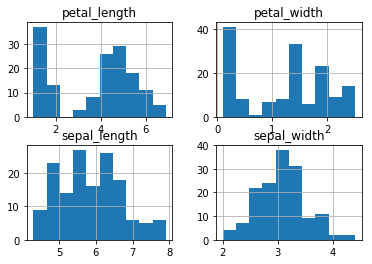

In [13]:
dataset.hist()
plt.show()



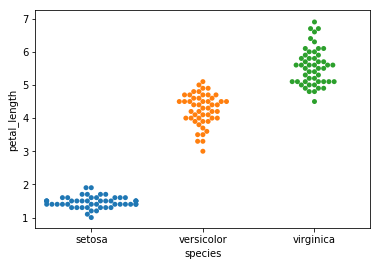

In [14]:
import seaborn as sns
# Load iris data
iris = sns.load_dataset("iris")

# Construct iris plot
sns.swarmplot(x="species", y="petal_length", data=iris)

# Show plot
plt.show()

In [15]:
accuracy = accuracy_score(y_test, y_pred, normalize = True)
print(accuracy)

0.9777777777777777


In [19]:
from sklearn.model_selection import cross_val_score
cr = cross_val_score(lr, X_train, y_train, cv=5)
print(cr)
print(accuracy_score(y_train, y_pred_train))

[0.86363636 1.         1.         0.9047619  0.94736842]
0.9904761904761905


C:\Users\Ketki\Anaconda_new\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Ketki\Anaconda_new\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Ketki\Anaconda_new\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Ketki\Anaconda_new\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Ketki\Anaconda_new\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iteration

In [20]:
y2_model = lr.fit(X_train, y_train).predict(X_test)
y1_model = lr.fit(X_test, y_test).predict(X_train)
accuracy_score(y_train, y1_model), accuracy_score(y_test, y2_model)

C:\Users\Ketki\Anaconda_new\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Ketki\Anaconda_new\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


(0.9523809523809523, 0.9777777777777777)